# Úkol č. 1 - vizualizace dat a web scraping (do 26. října)

  * V rámci tohoto úkolu musíte opanovat nástroje pro stahování dat z webu (tzv. _web scraping_) a následně data zpracovat a vizualizovat. 
  * Jak jsme ukázali na prvním cvičení (poslední část), data o závěrečných pracích na některých univerzitách skýtají zajímavé informace. 
  * Vaším úkolem je vybrat si jednu z univerzit ze seznamu níže, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace.
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Níže jsou odkazy na katalogy knihoven vybraných vysokých škol. Je třeba pochopit, jak z něho dostat informace o závěrečných pracích (bakalářky a diplomky) a ty pak nějak _vyparsovat_.

  * [Vysoká škola finanční a správní, a.s.](https://is.vsfs.cz/thesis/)
  * [Metropolitan university Prague](https://s-knihovna.mup.cz/katalog/eng/baze.htm)
  * [Vysoká škola regionálního rozvoje a Bankovní institut – AMBIS ](https://is.ambis.cz/thesis/)

Případně si můžete vybrat školu dle uvážení na portálu [theses.cz](https://theses.cz/th_search/tematicke), ale musí být splněno následující:
  * závěrečné práce musí být z jedné školy, alespoň z období 5 let, a musí jich být alespoň 2000,
  * u každé práce získáte alespoň následující: informaci o typu (bakalářka/diplomka), název, jméno vedoucího (vč. titulů), rok obhajoby, hodí se i jméno oponenta.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Stáhněte data z vybraného zdroje a uložte je do tabulky ve formátu _csv_.
  * Data musí obsahovat u každé práce (= 1 řádek tabulky) _alespoň_ toto:
    * informaci o typu (bakalářka/diplomka), název, jméno vedoucího (vč. titulů), rok obhajoby, hodí se i jméno oponenta
  * V druhé části Vašeho Jupyter notebooku pracujte s touto tabulkou načtenou z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulku ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu).
    * Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.). 
    * To samé pro oponenty a pro součet vedených a oponovaných prací.
    * Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího (resp. oponenta) a rok a další informace o rozložení vedení prací na školitele.
    * Rozložení vedoucích prací (a oponentů) podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) Zobrazte tabulku (a případně i jiné věci) v Jupyter notebooku pomocí http://beakerx.com.
  * (až +2 body) Vymyslete další zajímavé pohledy na data.
  * (až +4 body) Vytvořte na základě Vašich dat interaktivní webovou stránku s popisem a vizualizací dat (bude asi nutné použít i nějaké javascriptové balíčky atp.).
  * (až +4 body) Stáhněte data k více školám a porovnejte výsledky. Zkuste najít společné školitele/oponenty.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [44]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot')
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from time import sleep
pd.set_option('display.max_rows', 2200)

In [ ]:
url = 'https://theses.cz/th_search/tematicke'
data = {
    'FAK' : 'th63',
    'PRI' : '-', 
    'ROK' : '-',
    'TIT' : '-',
    'PRA' : '-', 
    'pg'  : '1',
    'vypsat' : 'Vyhledat'
}
i = 1
data_all = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

while True:
    r_main = requests.get(url, data)
    html_soup_main = BeautifulSoup(r_main.text, 'html.parser')
    soup_main = html_soup_main.find_all('div',class_='vysledek')
    if (len(soup_main) == 0):
        break
    for address in soup_main:
        r = requests.get('http://theses.cz'+address.find('a')['href'])
        html_soup = BeautifulSoup(r.text, 'html.parser')
        soup = html_soup.find_all('head')
        info = []
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.type' , 'xml:lang' : 'cze'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'citation_title'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'citation_publication_date'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.creators.name'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.creators.surname'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.advisors.name'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.advisors.surname'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.advisors.titul.za'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.advisors.titul.pred'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.referees.name'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.referees.surname'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.referees.titul.za'}))
        info.append(soup[0].find_all('meta', attrs={'name': 'DC.referees.titul.pred'}))
        
        for j in range(13):
            if len(info[j]) > 0:
                data_all[j].append(info[j][0]['content'])
            else:
                data_all[j].append(np.nan)
    i = i + 1
    data['pg'] = i
    sleep(150) # sleep to avoid limit in https://theses.cz

database = pd.DataFrame({
            "Typ": data_all[0], 
            "Nazev": data_all[1], 
            "Rok": data_all[2],
            "Autor_Krestni":data_all[3],
            "Autor_Prijmeni":data_all[4],
            "Vedouci_Krestni":data_all[5],
            "Vedouci_Prijmeni":data_all[6],
            "Vedouci_Titul_Za":data_all[7],
            "Vedouci_Titul_Pred":data_all[8],
            "Oponent_Krestni":data_all[9],
            "Oponent_Prijmeni":data_all[10],
            "Oponent_Titul_Za":data_all[11],
            "Oponent_Titul_Pred":data_all[12]
        })
database.to_csv('output.csv', index=False)

In [452]:
data = pd.read_csv('out6.csv')
data.info()
display(data[data['Nazev'].isnull()])
display(data[data['Vedouci_Krestni'].isnull()])
data=data.drop([1080,1417],axis=0).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 13 columns):
Typ                   2167 non-null object
Nazev                 2166 non-null object
Rok                   2167 non-null int64
Autor_Krestni         2167 non-null object
Autor_Prijmeni        2167 non-null object
Vedouci_Krestni       2165 non-null object
Vedouci_Prijmeni      2165 non-null object
Vedouci_Titul_Za      1297 non-null object
Vedouci_Titul_Pred    2165 non-null object
Oponent_Krestni       2165 non-null object
Oponent_Prijmeni      2165 non-null object
Oponent_Titul_Za      1218 non-null object
Oponent_Titul_Pred    2165 non-null object
dtypes: int64(1), object(12)
memory usage: 220.2+ KB


,Typ,Nazev,Rok,Autor_Krestni,Autor_Prijmeni,Vedouci_Krestni,Vedouci_Prijmeni,Vedouci_Titul_Za,Vedouci_Titul_Pred,Oponent_Krestni,Oponent_Prijmeni,Oponent_Titul_Za,Oponent_Titul_Pred
350,Diplomová práce,NaN,2013,Karin,Líšková,Eva,Mičková,NaN,Mgr.,Helena,Buřičová,NaN,Ing.


,Typ,Nazev,Rok,Autor_Krestni,Autor_Prijmeni,Vedouci_Krestni,Vedouci_Prijmeni,Vedouci_Titul_Za,Vedouci_Titul_Pred,Oponent_Krestni,Oponent_Prijmeni,Oponent_Titul_Za,Oponent_Titul_Pred
1080,Bakalářská práce,yyyyyyyyyyyyyyyyyyyyyyy,2013,Jan,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,Bakalářská práce,Účetní závěrka vybraného podnikatelského subje...,2016,Ivana,Knýřová,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 13 columns):
Typ                   2165 non-null object
Nazev                 2164 non-null object
Rok                   2165 non-null int64
Autor_Krestni         2165 non-null object
Autor_Prijmeni        2165 non-null object
Vedouci_Krestni       2165 non-null object
Vedouci_Prijmeni      2165 non-null object
Vedouci_Titul_Za      1297 non-null object
Vedouci_Titul_Pred    2165 non-null object
Oponent_Krestni       2165 non-null object
Oponent_Prijmeni      2165 non-null object
Oponent_Titul_Za      1218 non-null object
Oponent_Titul_Pred    2165 non-null object
dtypes: int64(1), object(12)
memory usage: 220.0+ KB


In [453]:
display(data[['Typ']].drop_duplicates())
bak = data[data['Typ'] == 'Bakalářská práce']
dip = data[data['Typ'] == 'Diplomová práce']

,Typ
0,Bakalářská práce
3,Diplomová práce


Text(0.5,1,'Pocet diplomovych praci za dany rok')

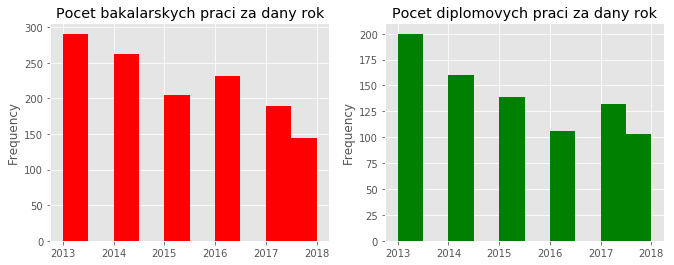

In [454]:
plt.figure(figsize=(11,4))
plt.subplot(121)
bak['Rok'].plot.hist(color='Red')
plt.title("Pocet bakalarskych praci za dany rok")
plt.subplot(122)
dip['Rok'].plot.hist(color='Green')
plt.title("Pocet diplomovych praci za dany rok")

In [455]:
data['Vedouci'] = data['Vedouci_Prijmeni'] + ' ' + data['Vedouci_Krestni']
data['Oponent'] = data['Oponent_Prijmeni'] + ' ' + data['Oponent_Krestni']
data.drop('Vedouci_Prijmeni', axis=1, inplace=True)
data.drop('Oponent_Prijmeni', axis=1, inplace=True)
data.drop('Vedouci_Krestni', axis=1, inplace=True)
data.drop('Oponent_Krestni', axis=1, inplace=True)

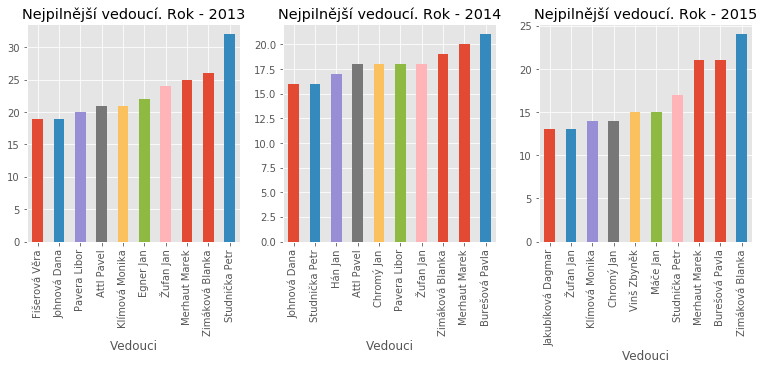

In [456]:
plt.figure(figsize=(13,4))
j=131
for i in range(3):
        data1 = data[data['Rok']==i+2013].groupby('Vedouci').size()
        plt.subplot(j)
        data1.sort_values()[-10:].plot(kind='bar')
        plt.title("Nejpilnější vedoucí. Rok - " + str(i+2013))
        j=j+1

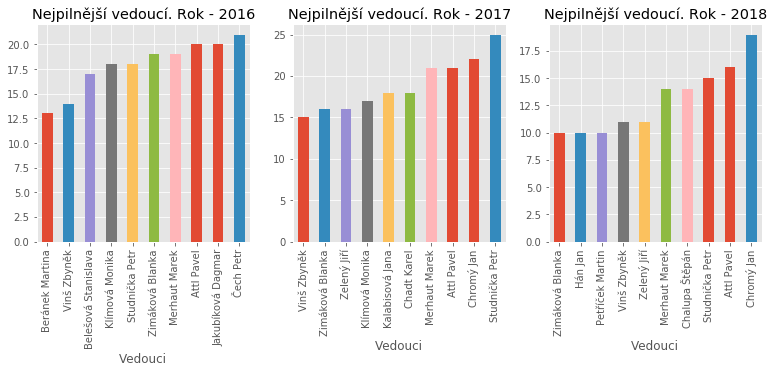

In [457]:
plt.figure(figsize=(13,4))
j=131
for i in range(3):
        data1 = data[data['Rok']==i+2016].groupby('Vedouci').size()
        plt.subplot(j)
        data1.sort_values()[-10:].plot(kind='bar')
        plt.title("Nejpilnější vedoucí. Rok - " + str(i+2016))
        j=j+1

Text(0.5,1,'Nejpilnější vedoucí')

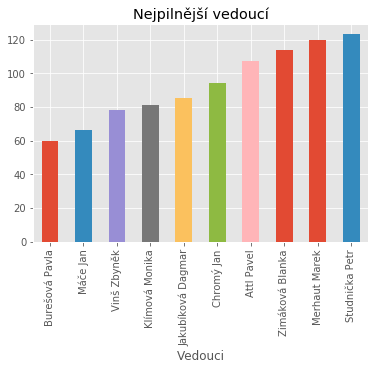

In [458]:
data1 = data.groupby('Vedouci').size()
data1.sort_values()[-10:].plot(kind='bar')
plt.title("Nejpilnější vedoucí")

Text(0.5,1,'Nejpilnější oponent')

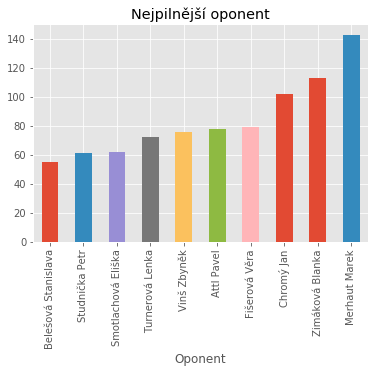

In [459]:
data1 = data.groupby('Oponent').size()
data1.sort_values()[-10:].plot(kind='bar')
plt.title("Nejpilnější oponent")

Text(0.5,1,'Nejpilnější osoba(soucet vedenych a oponovanych praci)')

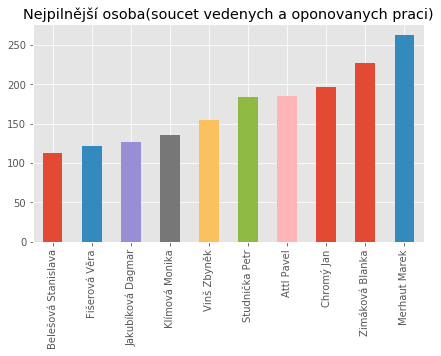

In [460]:
data1 = data['Vedouci']
data2 = data['Oponent']
data3 = pd.concat([data1,data2],ignore_index=True)
plt.figure(figsize=(7,4))
data3.groupby(data3).size().sort_values()[-10:].plot(kind='bar')
plt.title("Nejpilnější osoba(soucet vedenych a oponovanych praci)")

In [461]:
for i in range(6):
    data4 = data[data['Rok'] == i + 2013]
    print('Info o pracich na vedouciho na rok ' + str(i+2013))
    display(data4.groupby('Vedouci').size().describe())

Info o pracich na vedouciho na rok 2013


count    55.000000
mean      8.927273
std       8.171437
min       1.000000
25%       3.000000
50%       5.000000
75%      15.000000
max      32.000000
dtype: float64

Info o pracich na vedouciho na rok 2014


count    55.000000
mean      7.690909
std       6.585261
min       1.000000
25%       2.000000
50%       5.000000
75%      13.500000
max      21.000000
dtype: float64

Info o pracich na vedouciho na rok 2015


count    46.000000
mean      7.478261
std       6.087288
min       1.000000
25%       2.000000
50%       5.500000
75%      11.000000
max      24.000000
dtype: float64

Info o pracich na vedouciho na rok 2016


count    43.000000
mean      7.860465
std       6.530447
min       1.000000
25%       2.000000
50%       6.000000
75%      11.000000
max      21.000000
dtype: float64

Info o pracich na vedouciho na rok 2017


count    38.000000
mean      8.447368
std       7.351034
min       1.000000
25%       2.000000
50%       6.000000
75%      15.000000
max      25.000000
dtype: float64

Info o pracich na vedouciho na rok 2018


count    32.000000
mean      7.750000
std       4.662825
min       1.000000
25%       5.000000
50%       8.000000
75%      10.000000
max      19.000000
dtype: float64

Info o pracich na oponenta na rok


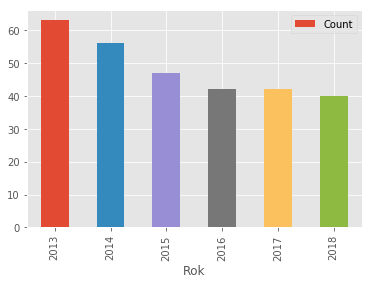

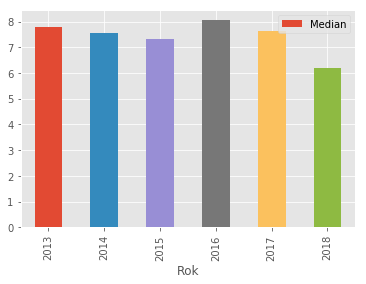

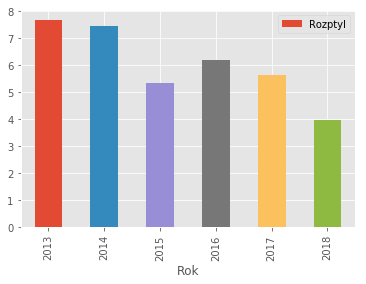

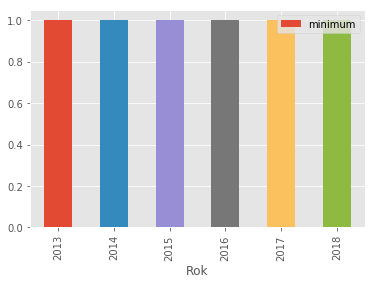

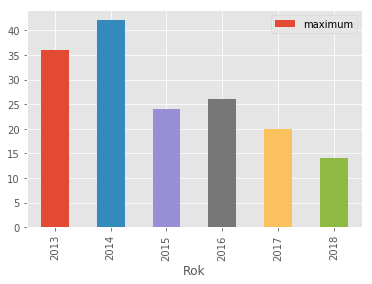

In [462]:
info = [[],[],[],[],[]]
for i in range(6):
    data4 = data[data['Rok'] == i + 2013]
    info[0].append(data4.groupby('Oponent').size().mean())
    info[1].append(data4.groupby('Oponent').size().std())
    info[2].append(data4.groupby('Oponent').size().max())
    info[3].append(data4.groupby('Oponent').size().min())
    info[4].append(data4.groupby('Oponent').size().count())
data5 = pd.DataFrame({
            "Rok": [2013,2014,2015,2016,2017,2018], 
            "Count" : info[4],
            "Median": info[0], 
            "Rozptyl": info[1],
            "minimum": info[3],
            "maximum": info[2]            
        })
x = data5['Rok']
y = data5['Count']
print('Info o pracich na oponenta na rok')
display(data5.plot(x='Rok',y='Count',kind='bar'))
display(data5.plot(x='Rok',y='Median',kind='bar'))
display(data5.plot(x='Rok',y='Rozptyl',kind='bar'))
display(data5.plot(x='Rok',y='minimum',kind='bar'))
display(data5.plot(x='Rok',y='maximum',kind='bar'))

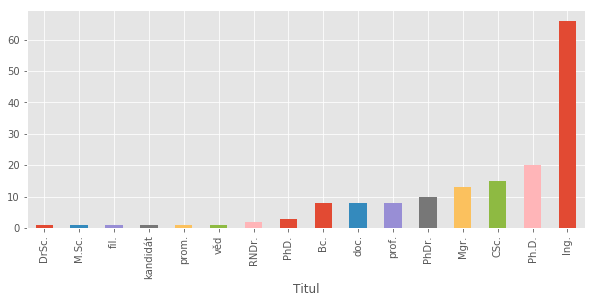

In [463]:
data7 = data[['Vedouci','Vedouci_Titul_Za','Vedouci_Titul_Pred']]
data7 = data7.drop_duplicates().sort_values(by='Vedouci')

data7 = data7.replace(np.nan, 'nic', regex=True)
data7 = data7.reset_index()
titul= []
for i in range(data7.shape[0]):
    st = data.loc[i]['Vedouci_Titul_Pred'].split(' ')
    for j in range(len(st)):
        titul.append(st[j])
    st = data7.loc[i]['Vedouci_Titul_Za'].split(' ')
    for j in range(len(st)):
        titul.append(st[j])
data7 = pd.DataFrame({
            "Titul": titul                      
        })
plt.figure(figsize=(10,4))

data7 = data7.groupby('Titul').size()
data7 = data7.drop(labels=['nic'])
data7.sort_values().plot(kind='bar')



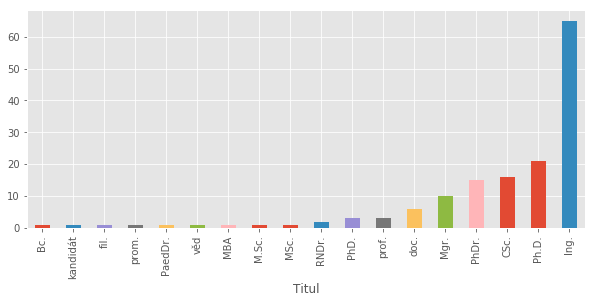

In [464]:
data7 = data[['Oponent','Oponent_Titul_Za','Oponent_Titul_Pred']]
data7 = data7.drop_duplicates().sort_values(by='Oponent')

data7 = data7.replace(np.nan, 'nic', regex=True)
data7 = data7.reset_index()
titul= []
for i in range(data7.shape[0]):
    st = data.loc[i]['Oponent_Titul_Pred'].split(' ')
    for j in range(len(st)):
        titul.append(st[j])
    st = data7.loc[i]['Oponent_Titul_Za'].split(' ')
    for j in range(len(st)):
        titul.append(st[j])
data7 = pd.DataFrame({
            "Titul": titul                      
        })
plt.figure(figsize=(10,4))
data7 = data7.groupby('Titul').size()
data7 = data7.drop(labels=['nic'])
data7.sort_values().plot(kind='bar')

In [ ]:
#